<a href="https://colab.research.google.com/github/yeseul106/Deep-Learning/blob/master/Flowers_Classification_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['sunflower', 'dandelion', 'daisy', 'tulip', 'rose']
이미지 리스트를 저장한 파일을 생성했습니다.
Epoch 1/40
31/31 [==============================] - 150s 5s/step - loss: 2.8487 - accuracy: 0.2099 - val_loss: 1.6057 - val_accuracy: 0.2737
Epoch 2/40
31/31 [==============================] - 148s 5s/step - loss: 1.5962 - accuracy: 0.2586 - val_loss: 1.5485 - val_accuracy: 0.3061
Epoch 3/40
31/31 [==============================] - 148s 5s/step - loss: 1.5406 - accuracy: 0.2997 - val_loss: 1.4879 - val_accuracy: 0.3331
Epoch 4/40
31/31 [==============================] - 148s 5s/step - loss: 1.4696 - accuracy: 0.3670 - val_loss: 1.4620 - val_accuracy: 0.3601
Epoch 5/40
31/31 [==============================] - 149s 5s/step - loss: 1.4145 - accuracy: 0.3993 - val_loss: 1.4241 - val_accuracy: 0.3847
Epoch 6/40
31/31 [==============================] - 149s 5s/step - loss: 1.3128 - accu

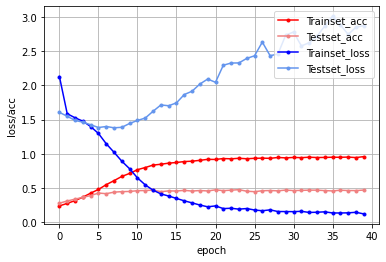

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten, GlobalMaxPooling2D, Conv2D, Dropout, MaxPooling2D
from google.colab.patches import cv2

'''make a csv file'''
path = '/content/gdrive/My Drive/Colab Notebooks/flowers'
with open("imageLists.csv", "w") as f:
    lists = os.listdir(path)
    print(lists)
    #daisy=0, dandelion=1, rose=2, sunflower=3, tulip=4 (인덱스를 부여)
    f.write('image_name'+','+'class\n')
    for i in range(len(lists)):
        sub_list = os.listdir(path + '/' + lists[i])
        #print(sub_list)
        for image_name in sub_list:
            f.write(image_name+','+str(i)+'\n')
    print("이미지 리스트를 저장한 파일을 생성했습니다.")

'''read csv file & image file'''
flowers = pd.read_csv('imageLists.csv')
# print(flowers.head())
flowers = flowers.values
flowers = sklearn.utils.shuffle(flowers)  #넘파이 배열로 변환됨
# print(len(flowers))  #4323
# print(flowers.head())

'''image 리스트 만들기'''
imageList = []
# image_namelist = flowers[:,0]
# print(image_namelist)

# path_list = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
#image가 1차원으로 펼쳐져서 리스트에 저장되어 있음
for i in range(len(flowers)):
    img_path = path + '/' + lists[flowers[i, 1]] + '/' + flowers[i,0]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_AREA)  #image 크기 200*200으로 바꾸기
    img_new = np.reshape(img, (-1, 40000))
    imageList.append(img)

# #image 픽셀 값을 0~1 사이의 값으로 만들기
for i in range(len(imageList)):
    imageList[i] = imageList[i].astype('float32')
    imageList[i] = imageList[i]/255

'''split train_set and test_set'''
X = np.array(imageList)
X = X.reshape(len(X), 200, 200, 1)
Y = np.array(flowers[:, 1])
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

'''set CNN model'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(200, 200, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  #출력층 노드 5개

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test, y_test))
print("\n Test accuracy:%.4f"% (model.evaluate(x_test, y_test)[1]))

'''graph로 표현'''
y_vloss = history.history['val_loss']  #테스트셋 오차
y_loss = history.history['loss']  #학습셋 오차
y_vacc = history.history['val_accuracy']  #테스트셋 정확률
y_acc = history.history['accuracy']  #학습셋 정확률

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, y_vacc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
